In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
violations = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Automated_Camera_Enforcement_Violations__Beginning_October_2019_20250919.csv')
speed_2025 = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Route_Segment_Speeds__Beginning_2025_20250919.csv')
speed_2324 = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Route_Segment_Speeds2023_2024.csv')

In [50]:
print(speed_2324.head())

   Year  Month               Timestamp Route ID   Borough Route Type  \
0  2023      3  03/01/2023 09:00:00 AM       B6  Brooklyn    Limited   
1  2023      3  03/01/2023 01:00:00 PM       B6  Brooklyn    Limited   
2  2023      3  03/01/2023 01:00:00 AM     BX42     Bronx      Local   
3  2023      3  03/01/2023 01:00:00 PM     BXM1     Bronx    Express   
4  2023      3  03/01/2023 12:00:00 PM     BXM1     Bronx    Express   

   Stop Order  Timepoint Stop ID      Timepoint Stop Name  \
0           1             306921    LIVONIA AV/ASHFORD ST   
1           1             306921    LIVONIA AV/ASHFORD ST   
2          29             102613  RANDALL AV/E TREMONT AV   
3          13             404250        BROADWAY/W 207 ST   
4          29             403424     LEXINGTON AV/E 50 ST   

   Next Timepoint Stop ID Next Timepoint Stop Name  Road Distance  \
0                  300590    COZINE AV /ASHFORD ST          0.724   
1                  300590    COZINE AV /ASHFORD ST          0.

In [51]:
print(speed_2324.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656097 entries, 0 to 11656096
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   Month                     int64  
 2   Timestamp                 object 
 3   Route ID                  object 
 4   Borough                   object 
 5   Route Type                object 
 6   Stop Order                int64  
 7   Timepoint Stop ID         int64  
 8   Timepoint Stop Name       object 
 9   Next Timepoint Stop ID    int64  
 10  Next Timepoint Stop Name  object 
 11  Road Distance             float64
 12  Average Travel Time       float64
 13  Average Road Speed        float64
 14  Bus Trip Count            int64  
 15  Hour of Day               int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 1.4+ GB
None


In [52]:
print(speed_2324.isnull().sum())

Year                           0
Month                          0
Timestamp                      0
Route ID                       0
Borough                        0
Route Type                     0
Stop Order                     0
Timepoint Stop ID              0
Timepoint Stop Name         2352
Next Timepoint Stop ID         0
Next Timepoint Stop Name    2040
Road Distance                  0
Average Travel Time            0
Average Road Speed             0
Bus Trip Count                 0
Hour of Day                    0
dtype: int64


In [9]:
print(speed_2025.head())

   Year  Month               Timestamp Day of Week  Hour of Day Route ID  \
0  2025      3  03/01/2025 05:00:00 PM    Thursday           17       B3   
1  2025      3  03/01/2025 10:00:00 AM    Thursday           10      B84   
2  2025      3  03/01/2025 06:00:00 PM    Thursday           18      B84   
3  2025      3  03/01/2025 10:00:00 AM    Thursday           10     BXM1   
4  2025      3  03/01/2025 12:00:00 PM    Thursday           12      M11   

  Direction    Borough Route Type  Stop Order  ...  Next Timepoint Stop ID  \
0         E   Brooklyn      Local          24  ...                  300220   
1         S   Brooklyn      Local           1  ...                  300590   
2         S   Brooklyn      Local           1  ...                  300590   
3         S      Bronx    Express          29  ...                  403821   
4         S  Manhattan      Local           7  ...                  401459   

  Next Timepoint Stop Name  Next Timepoint Stop Latitude  \
0     AVENUE U

In [10]:
print(speed_2025.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411549 entries, 0 to 3411548
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Month                             int64  
 2   Timestamp                         object 
 3   Day of Week                       object 
 4   Hour of Day                       int64  
 5   Route ID                          object 
 6   Direction                         object 
 7   Borough                           object 
 8   Route Type                        object 
 9   Stop Order                        int64  
 10  Timepoint Stop ID                 int64  
 11  Timepoint Stop Name               object 
 12  Timepoint Stop Latitude           float64
 13  Timepoint Stop Longitude          float64
 14  Next Timepoint Stop ID            int64  
 15  Next Timepoint Stop Name          object 
 16  Next Timepoint Stop Latitude      fl

In [41]:
print(violations.head())

   Violation ID                                         Vehicle ID  \
0     489749182  c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...   
1     489744714  df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...   
2     489743631  eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...   
3     489741945  3f877f70d9b253515a945be807c9c62d5814949f810310...   
4     489741940  7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...   

         First Occurrence         Last Occurrence            Violation Status  \
0  08/20/2025 11:12:08 PM  08/21/2025 12:24:08 AM       TECHNICAL ISSUE/OTHER   
1  08/20/2025 11:48:59 PM  08/20/2025 11:54:47 PM    EXEMPT - BUS/PARATRANSIT   
2  08/20/2025 10:33:13 PM  08/20/2025 11:56:02 PM       TECHNICAL ISSUE/OTHER   
3  08/20/2025 10:50:45 PM  08/20/2025 11:32:43 PM              EXEMPT - OTHER   
4  08/20/2025 10:52:57 AM  08/20/2025 11:16:57 AM  EXEMPT - EMERGENCY VEHICLE   

         Violation Type Bus Route ID  Violation Latitude  Violation Longitude  \
0       MOB

In [14]:
#columns with null values

print(speed_2025.isnull().sum())

Year                                   0
Month                                  0
Timestamp                              0
Day of Week                            0
Hour of Day                            0
Route ID                               0
Direction                              0
Borough                                0
Route Type                             0
Stop Order                             0
Timepoint Stop ID                      0
Timepoint Stop Name                 1210
Timepoint Stop Latitude             1210
Timepoint Stop Longitude            1210
Next Timepoint Stop ID                 0
Next Timepoint Stop Name             977
Next Timepoint Stop Latitude         977
Next Timepoint Stop Longitude        977
Road Distance                          0
Average Travel Time                    0
Average Road Speed                     0
Bus Trip Count                         0
Timepoint Stop Georeference         1210
Next Timepoint Stop Georeference     977
dtype: int64


In [7]:
print(violations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778568 entries, 0 to 3778567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Violation ID            int64  
 1   Vehicle ID              object 
 2   First Occurrence        object 
 3   Last Occurrence         object 
 4   Violation Status        object 
 5   Violation Type          object 
 6   Bus Route ID            object 
 7   Violation Latitude      float64
 8   Violation Longitude     float64
 9   Stop ID                 int64  
 10  Stop Name               object 
 11  Bus Stop Latitude       float64
 12  Bus Stop Longitude      float64
 13  Violation Georeference  object 
 14  Bus Stop Georeference   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 432.4+ MB
None


In [11]:
# Types of violations
print(violations['Violation Type'].unique())
print(violations['Violation Type'].nunique())

['MOBILE BUS STOP' 'MOBILE DOUBLE PARKED' 'MOBILE BUS LANE']
3


In [13]:
#Columns with null values

print(violations.isnull().sum())

#Question: What do we want to do with the null values in the bus route ID column? 

Violation ID                  0
Vehicle ID                66366
First Occurrence              0
Last Occurrence               0
Violation Status              0
Violation Type                0
Bus Route ID              10749
Violation Latitude            0
Violation Longitude           0
Stop ID                       0
Stop Name                     0
Bus Stop Latitude             0
Bus Stop Longitude            0
Violation Georeference        0
Bus Stop Georeference         0
dtype: int64


In [17]:
# Number of Mobile Bus Stop Violations 
violations["Violation Type"].value_counts()["MOBILE BUS STOP"]



np.int64(1243186)

In [18]:
# Number of Mobile Double Parked Violations
violations["Violation Type"].value_counts()["MOBILE DOUBLE PARKED"]

np.int64(1267541)

In [20]:
# Number of MOBILE BUS LANE 
violations["Violation Type"].value_counts()["MOBILE BUS LANE"]

np.int64(1267841)

In [ ]:
#Plot these numbers on a bar plot

In [ ]:
# The number of each violation type occurs with almost the same amount of frequency. With this being the case do these violations have different effects of the avg total travel time for buses?

In [64]:
# Combining two datasets into a new dataset called speed. This contains all the speed info from 2023-2025


# 1) Parse timestamps in each dataset
for df in (speed_2025, speed_2324):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# 2) Clean column names (strip hidden spaces)
for df in (speed_2025, speed_2324):
    df.columns = df.columns.str.strip()

# 3) Align to common columns (avoids mismatches)
common_cols = speed_2025.columns.intersection(speed_2324.columns)
speed_2025 = speed_2025[common_cols].copy()
speed_2324 = speed_2324[common_cols].copy()

# 4) Concatenate row-wise into one dataset
speed = pd.concat([speed_2025, speed_2324], ignore_index=True)

In [73]:
# Double checking concatenation 

print("Step 1(Check Rows):")
print("2025 rows:", len(speed_2025))
print("2023–24 rows:", len(speed_2324))
print("Combined rows:", len(speed))
print("Should equal:", len(speed_2025) + len(speed_2324))

print("Step 2 (Check Columns for duplicates):")
print(speed.columns.tolist())

print("Step 3 (Check time coverage)")
print("Earliest timestamp:", speed["Timestamp"].min())
print("Latest timestamp:", speed["Timestamp"].max())


print("Step 4 (Look at top and bottom rows)")
print(speed.head())    # look at top rows
print(speed.tail())    # look at bottom rows









Step 1(Check Rows):
2025 rows: 3411549
2023–24 rows: 11656097
Combined rows: 15067646
Should equal: 15067646
Step 2 (Check Columns for duplicates):
['Year', 'Month', 'Timestamp', 'Hour of Day', 'Route ID', 'Borough', 'Route Type', 'Stop Order', 'Timepoint Stop ID', 'Timepoint Stop Name', 'Next Timepoint Stop ID', 'Next Timepoint Stop Name', 'Road Distance', 'Average Travel Time', 'Average Road Speed', 'Bus Trip Count']
Step 3 (Check time coverage)
Earliest timestamp: 2023-01-01 00:00:00
Latest timestamp: 2025-07-01 23:00:00
Step 4 (Look at top and bottom rows)
   Year  Month           Timestamp  Hour of Day Route ID    Borough  \
0  2025      3 2025-03-01 17:00:00           17       B3   Brooklyn   
1  2025      3 2025-03-01 10:00:00           10      B84   Brooklyn   
2  2025      3 2025-03-01 18:00:00           18      B84   Brooklyn   
3  2025      3 2025-03-01 10:00:00           10     BXM1      Bronx   
4  2025      3 2025-03-01 12:00:00           12      M11  Manhattan   

  Rout

In [75]:
 


# 1) Does each VIOLATION ID map to exactly one type?
viol_per_id = (violations
               .groupby("Violation ID")["Violation Type"]
               .nunique())
print("Max types per VIOLATION ID:", viol_per_id.max())
# Expect 1. If >1, some IDs are tied to multiple types.

# 2) Any rows with missing or multiple-looking types?
print("Missing types:", violations["Violation Type"].isna().sum())
# If types are text, look for separators that might indicate multi-encoded types:
suspect = violations[violations["Violation Type"].astype(str).str.contains(r"[;,/]| and ", case=False, na=False)]
print("Rows that look like multiple types:", len(suspect))
# Inspect a few:
print(suspect[["Violation ID","Violation Type"]].head(10))

# 3) Sanity: number of rows equals number of 'violations' if each row is one violation
print("Rows in violations table:", len(violations))
print("Unique VIOLATION ID count:", violations["Violation ID"].nunique())
# Often these should match; if not, you may have duplicate IDs or multiple rows per ID.


Max types per VIOLATION ID: 1
Missing types: 0
Rows that look like multiple types: 0
Empty DataFrame
Columns: [Violation ID, Violation Type]
Index: []
Rows in violations table: 3778568
Unique VIOLATION ID count: 3778568


In [81]:
#Merging Speed and Violations

# 1) Parse timestamps to real datetimes
speed["Timestamp"] = pd.to_datetime(speed["Timestamp"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
violations["First Occurrence"] = pd.to_datetime(violations["First Occurrence"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

# Drop rows with missing timestamps (optional but common-sense)
speed = speed.dropna(subset=["Timestamp"])
violations = violations.dropna(subset=["First Occurrence"])

# 2) Normalize route IDs / column names you’ll use
speed = speed.rename(columns={"Route ID": "RouteID"})
violations = violations.rename(columns={"Bus Route ID": "RouteID",
                                        "Violation TYPE": "Violation Type"})

# 3) Extract DATE and HOUR for alignment
speed["Date"] = speed["Timestamp"].dt.date
speed["Hour"] = speed["Timestamp"].dt.hour

violations["Date"] = violations["First Occurrence"].dt.date
violations["Hour"] = violations["First Occurrence"].dt.hour

# 4) Aggregate SPEED to ROUTEID × DATE × HOUR
#    (If there are multiple rows per hour—e.g., by segment—average them; sum trips.)
speed_agg = (speed
    .groupby(["RouteID","Date","Hour"], as_index=False)
    .agg(AVERAGE_TRAVEL_TIME = ("Average Travel Time", "mean"),
         AVERAGE_ROAD_SPEED  = ("Average Road Speed", "mean"),  # keep your exact col name; fix typo if needed
         BUS_TRIPS            = ("Bus Trip Count", "sum"))
)

# 5) Aggregate VIOLATIONS to ROUTEID × DATE × HOUR × TYPE, then pivot wide
viol_counts = (violations
    .groupby(["RouteID","Date","Hour","Violation Type"], dropna=False)
    .size()
    .reset_index(name="VIOL_COUNT")
)

viol_wide = (viol_counts
    .pivot_table(index=["RouteID","Date","Hour"],
                 columns="Violation Type",
                 values="VIOL_COUNT",
                 aggfunc="sum",
                 fill_value=0)
    .reset_index()
)
viol_wide.columns.name = None
# Prefix violation columns so they're easy to find
viol_wide = viol_wide.rename(columns=lambda c: c if c in ["RouteID","Date","Hour"] else f"VIOL_{c}")

# 6) Merge on keys → ROUTEID, DATE, HOUR
merged = speed_agg.merge(viol_wide, on=["RouteID","Date","Hour"], how="left")

# Fill hours with no violations as 0
viol_cols = [c for c in merged.columns if c.startswith("VIOL_")]
merged[viol_cols] = merged[viol_cols].fillna(0)

print(merged.head(10))


  RouteID        Date  Hour  AVERAGE_TRAVEL_TIME  AVERAGE_ROAD_SPEED  \
0      B1  2023-01-01     0             7.209302           11.332192   
1      B1  2023-01-01     1             6.567234           12.573072   
2      B1  2023-01-01     2             6.536712           12.520026   
3      B1  2023-01-01     3             6.277351           13.678793   
4      B1  2023-01-01     4             6.786977           12.169615   
5      B1  2023-01-01     5             7.663546           10.769823   
6      B1  2023-01-01     6             9.270817            9.482265   
7      B1  2023-01-01     7            10.853667            8.233116   
8      B1  2023-01-01     8            10.476439            8.186048   
9      B1  2023-01-01     9            10.085108            8.706279   

   BUS_TRIPS  VIOL_MOBILE BUS LANE  VIOL_MOBILE BUS STOP  \
0        464                   0.0                   0.0   
1        446                   0.0                   0.0   
2        393               

In [82]:
merged["VIOL_TOTAL"] = merged[viol_cols].sum(axis=1)
merged["VIOL_PER_TRIP"] = np.where(merged["BUS_TRIPS"] > 0,
                                   merged["VIOL_TOTAL"] / merged["BUS_TRIPS"], 0)

In [84]:
merged.columns = merged.columns.str.upper()


In [128]:
# 0) Identify violation columns
viol_cols = [c for c in panel.columns if c.startswith("VIOL_")]

# 1) Build a single constant baseline = average time when TOTAL violations == 0 (across all routes/hours)
panel["VIOL_TOTAL"] = panel[viol_cols].sum(axis=1)
EXPECTED_GLOBAL = panel.loc[panel["VIOL_TOTAL"] == 0, "AVERAGE_TRAVEL_TIME"].mean()

# 2) Summarizer that uses the SAME expected in every row
def summarize_by_count_constant_expected(df, count_col):
    out = (
        df.groupby(count_col, as_index=False)
          .agg(
              ACTUAL_AVG = ("AVERAGE_TRAVEL_TIME","mean"),
              OCCURRENCES      = ("ROUTEID","count")
          )
          .sort_values(count_col)
          .reset_index(drop=True)
    )
    out["EXPECTED_AVG"]   = EXPECTED_GLOBAL         # same number in every row
    out["EXTRA_DELAY_MIN"] = out["ACTUAL_AVG"] - out["EXPECTED_AVG"]
    return out

# 3) Build your three tables
VIOL_BL = [c for c in viol_cols if "LANE"   in c.upper()][0]
VIOL_DP = [c for c in viol_cols if "DOUBLE" in c.upper() and "PARK" in c.upper()][0]
VIOL_BS = [c for c in viol_cols if "STOP"   in c.upper()][0]

dp_summary = summarize_by_count_constant_expected(panel, VIOL_DP)
bs_summary = summarize_by_count_constant_expected(panel, VIOL_BS)
bl_summary = summarize_by_count_constant_expected(panel, VIOL_BL)

print("Double-parked:\n", dp_summary.head(), "\n")
print("Bus-stop blocked:\n", bs_summary.head(), "\n")
print("Bus lane:\n", bl_summary.head())


Double-parked:
    VIOL_MOBILE DOUBLE PARKED  ACTUAL_AVG  OCCURRENCES  EXPECTED_AVG  \
0                        0.0   10.145600       204299     10.108723   
1                        1.0   13.098251          921     10.108723   
2                        2.0   13.848507          575     10.108723   
3                        3.0   14.687962          391     10.108723   
4                        4.0   15.476433          309     10.108723   

   EXTRA_DELAY_MIN  
0         0.036877  
1         2.989528  
2         3.739783  
3         4.579238  
4         5.367710   

Bus-stop blocked:
    VIOL_MOBILE BUS STOP  ACTUAL_AVG  OCCURRENCES  EXPECTED_AVG  \
0                   0.0   10.133088       202617     10.108723   
1                   1.0   11.103764         1246     10.108723   
2                   2.0   12.356618          817     10.108723   
3                   3.0   13.274918          660     10.108723   
4                   4.0   14.164721          543     10.108723   

   EXTRA_DELA

In [120]:
print(dp_summary.head(100))

    VIOL_MOBILE DOUBLE PARKED  ACTUAL_AVG   HOURS  EXPECTED_AVG  \
0                         0.0   10.145600  204299     10.108723   
1                         1.0   13.098251     921     10.108723   
2                         2.0   13.848507     575     10.108723   
3                         3.0   14.687962     391     10.108723   
4                         4.0   15.476433     309     10.108723   
..                        ...         ...     ...           ...   
58                       59.0   12.726247       3     10.108723   
59                       61.0   11.217111       3     10.108723   
60                       63.0   12.608519       1     10.108723   
61                       64.0   11.796550       1     10.108723   
62                       66.0   16.004068       1     10.108723   

    EXTRA_DELAY_MIN  
0          0.036877  
1          2.989528  
2          3.739783  
3          4.579238  
4          5.367710  
..              ...  
58         2.617524  
59         1.108387

In [160]:
print(bl_summary.head(100))

    VIOL_MOBILE BUS LANE  ACTUAL_AVG  OCCURRENCES  EXPECTED_AVG  \
0                    0.0   10.162661       205455     10.108723   
1                    1.0   14.497133         1068     10.108723   
2                    2.0   14.771481          567     10.108723   
3                    3.0   15.539040          328     10.108723   
4                    4.0   15.841669          216     10.108723   
5                    5.0   16.606365          164     10.108723   
6                    6.0   16.586793           90     10.108723   
7                    7.0   15.922687           96     10.108723   
8                    8.0   17.346169           56     10.108723   
9                    9.0   17.030895           43     10.108723   
10                  10.0   16.605421           54     10.108723   
11                  11.0   17.084697           30     10.108723   
12                  12.0   16.480425           36     10.108723   
13                  13.0   18.233722           25     10.10872

In [121]:
print(dp_summary.head(100))

    VIOL_MOBILE DOUBLE PARKED  ACTUAL_AVG   HOURS  EXPECTED_AVG  \
0                         0.0   10.145600  204299     10.108723   
1                         1.0   13.098251     921     10.108723   
2                         2.0   13.848507     575     10.108723   
3                         3.0   14.687962     391     10.108723   
4                         4.0   15.476433     309     10.108723   
..                        ...         ...     ...           ...   
58                       59.0   12.726247       3     10.108723   
59                       61.0   11.217111       3     10.108723   
60                       63.0   12.608519       1     10.108723   
61                       64.0   11.796550       1     10.108723   
62                       66.0   16.004068       1     10.108723   

    EXTRA_DELAY_MIN  
0          0.036877  
1          2.989528  
2          3.739783  
3          4.579238  
4          5.367710  
..              ...  
58         2.617524  
59         1.108387

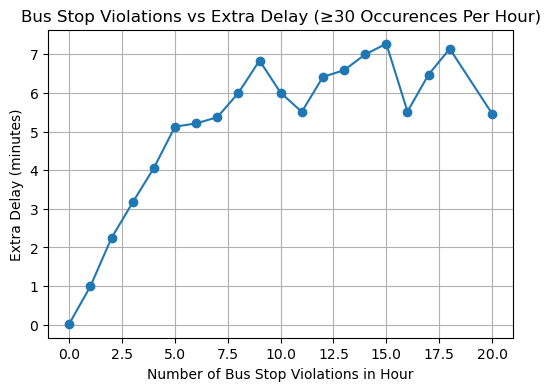

In [137]:
df = bs_summary[bs_summary["OCCURRENCES"] >= 30].copy()  

plt.figure(figsize=(6,4))

plt.plot(df[VIOL_BS], df["EXTRA_DELAY_MIN"], marker="o")

plt.title("Bus Stop Violations vs Extra Delay (≥30 Occurences Per Hour)")
plt.xlabel("Number of Bus Stop Violations in Hour")
plt.ylabel("Extra Delay (minutes)")

plt.grid(True)
plt.show()

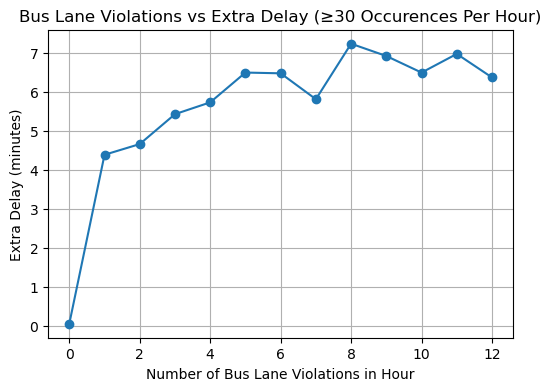

In [138]:
df = bl_summary[bl_summary["OCCURRENCES"] >= 30].copy()  

plt.figure(figsize=(6,4))

plt.plot(df[VIOL_BL], df["EXTRA_DELAY_MIN"], marker="o")

plt.title("Bus Lane Violations vs Extra Delay (≥30 Occurences Per Hour)")
plt.xlabel("Number of Bus Lane Violations in Hour")
plt.ylabel("Extra Delay (minutes)")

plt.grid(True)
plt.show()

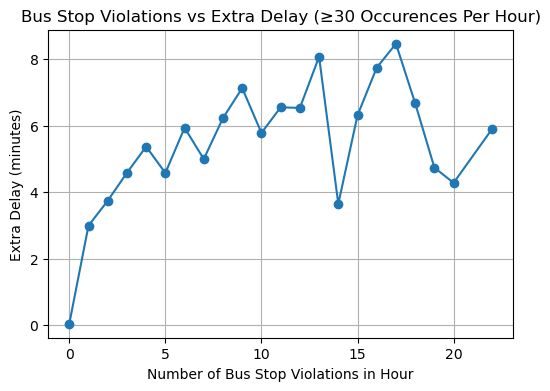

In [139]:
df = dp_summary[dp_summary["OCCURRENCES"] >= 30].copy()  # or dp_summary / bl_summary

plt.figure(figsize=(6,4))

plt.plot(df[VIOL_DP], df["EXTRA_DELAY_MIN"], marker="o")

plt.title("Bus Stop Violations vs Extra Delay (≥30 Occurences Per Hour)")
plt.xlabel("Number of Bus Stop Violations in Hour")
plt.ylabel("Extra Delay (minutes)")

plt.grid(True)
plt.show()

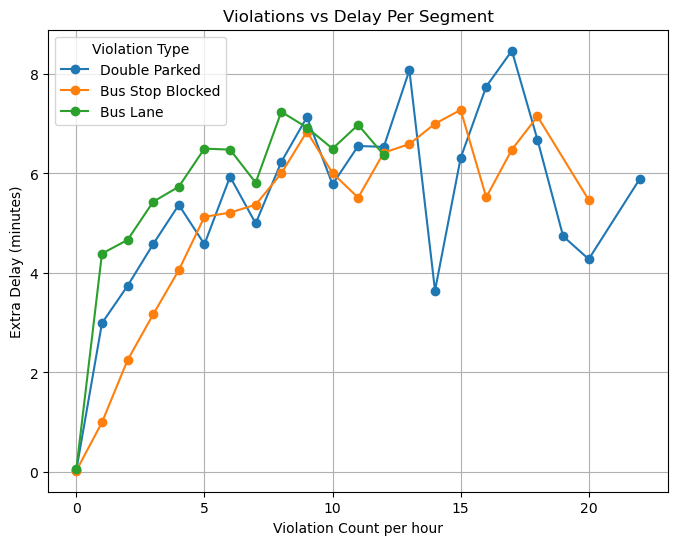

In [153]:
plt.figure(figsize=(8,6))

# Double parked
df_dp = dp_summary[dp_summary["OCCURRENCES"] >= 30]
plt.plot(df_dp[VIOL_DP], df_dp["EXTRA_DELAY_MIN"], marker="o", label="Double Parked")

# Bus stop blocked
df_bs = bs_summary[bs_summary["OCCURRENCES"] >= 30]
plt.plot(df_bs[VIOL_BS], df_bs["EXTRA_DELAY_MIN"], marker="o", label="Bus Stop Blocked")

# Bus lane
df_bl = bl_summary[bl_summary["OCCURRENCES"] >= 30]
plt.plot(df_bl[VIOL_BL], df_bl["EXTRA_DELAY_MIN"], marker="o", label="Bus Lane")

plt.title("Violations vs Delay Per Segment")
plt.xlabel("Violation Count per hour")
plt.ylabel("Extra Delay (minutes)")
plt.legend(title="Violation Type")
plt.grid(True)
plt.show()

/var/folders/v2/80dcm9050t3cx9t8563gg0sc0000gn/T/ipykernel_19905/2877074673.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dp_binned = df_dp_b.groupby("COUNT_BIN", as_index=True).agg(
/var/folders/v2/80dcm9050t3cx9t8563gg0sc0000gn/T/ipykernel_19905/2877074673.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bs_binned = df_bs_b.groupby("COUNT_BIN", as_index=True).agg(
/var/folders/v2/80dcm9050t3cx9t8563gg0sc0000gn/T/ipykernel_19905/2877074673.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

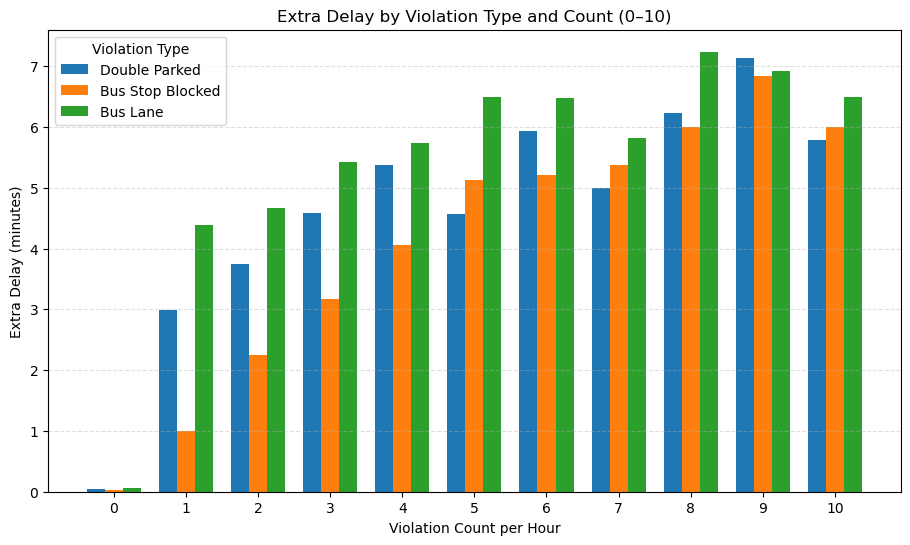

In [159]:
import pandas as pd
import numpy as np

def add_bins(df, count_col):
    df = df.copy()
    df["COUNT_BIN"] = pd.cut(
        df[count_col],
        bins=[-0.1, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5],
        labels=["0","1","2","3","4","5","6","7","8","9","10"],
        include_lowest=True
    )
    return df

df_dp_b = add_bins(dp_summary, VIOL_DP)
df_bs_b = add_bins(bs_summary, VIOL_BS)
df_bl_b = add_bins(bl_summary, VIOL_BL)

# Aggregate to bins
dp_binned = df_dp_b.groupby("COUNT_BIN", as_index=True).agg(
    EXTRA_DELAY_MIN=("EXTRA_DELAY_MIN","mean"),
    OCCURRENCES=("OCCURRENCES","sum")
)
bs_binned = df_bs_b.groupby("COUNT_BIN", as_index=True).agg(
    EXTRA_DELAY_MIN=("EXTRA_DELAY_MIN","mean"),
    OCCURRENCES=("OCCURRENCES","sum")
)
bl_binned = df_bl_b.groupby("COUNT_BIN", as_index=True).agg(
    EXTRA_DELAY_MIN=("EXTRA_DELAY_MIN","mean"),
    OCCURRENCES=("OCCURRENCES","sum")
)
import matplotlib.pyplot as plt

counts = ["0","1","2","3","4","5","6","7","8","9","10"]
x = np.arange(len(counts))
width = 0.25

fig, ax = plt.subplots(figsize=(11,6))

y_dp = [dp_binned.loc[c, "EXTRA_DELAY_MIN"] if c in dp_binned.index else np.nan for c in counts]
y_bs = [bs_binned.loc[c, "EXTRA_DELAY_MIN"] if c in bs_binned.index else np.nan for c in counts]
y_bl = [bl_binned.loc[c, "EXTRA_DELAY_MIN"] if c in bl_binned.index else np.nan for c in counts]

ax.bar(x - width, y_dp, width, label="Double Parked")
ax.bar(x,        y_bs, width, label="Bus Stop Blocked")
ax.bar(x + width, y_bl, width, label="Bus Lane")

ax.set_xticks(x)
ax.set_xticklabels(counts)
ax.set_xlabel("Violation Count per Hour")
ax.set_ylabel("Extra Delay (minutes)")
ax.set_title("Extra Delay by Violation Type and Count (0–10)")
ax.legend(title="Violation Type")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()



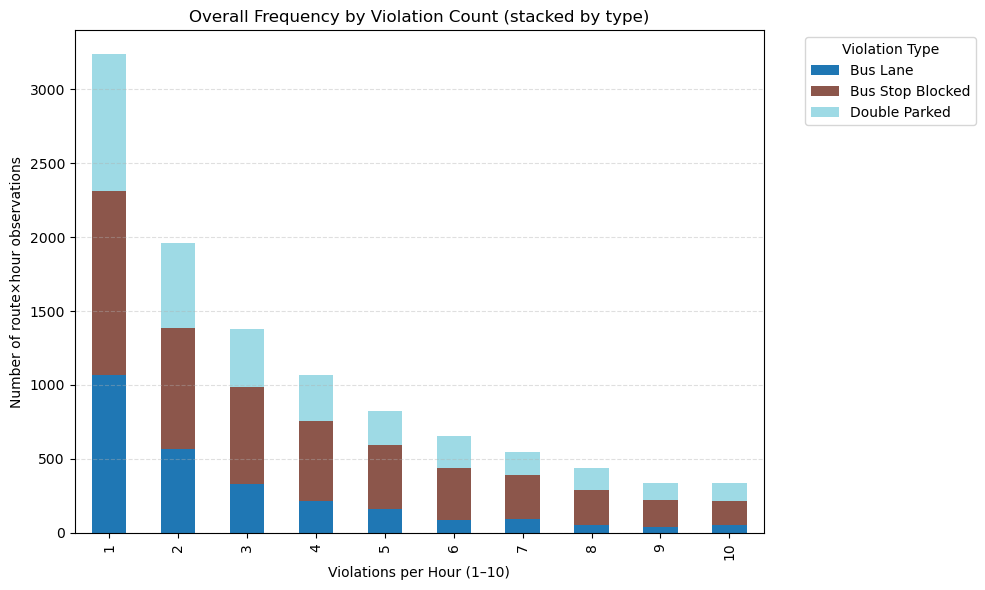

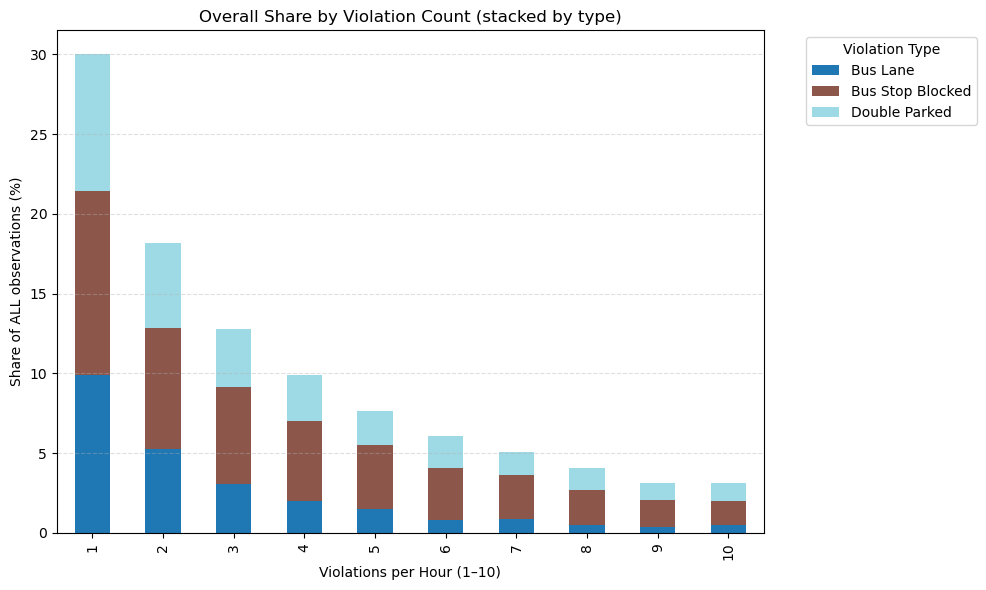

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CLIP_AT = 10                 # keep counts 1..10 only (exclude >10 and 0)
COUNTS = list(range(1, CLIP_AT+1))

def clip_and_sum(df, count_col, label):
    df = df.copy()
    # keep only 1..10 exactly (no 0, no >10)
    df = df[(df[count_col] >= 1) & (df[count_col] <= CLIP_AT)]
    agg = df.groupby(count_col, as_index=False)["OCCURRENCES"].sum()
    agg["VIOLATION_TYPE"] = label
    return agg.rename(columns={count_col: "COUNT"})

# Build frequency tables per type
dp_freq = clip_and_sum(dp_summary, VIOL_DP, "Double Parked")
bs_freq = clip_and_sum(bs_summary, VIOL_BS, "Bus Stop Blocked")
bl_freq = clip_and_sum(bl_summary, VIOL_BL, "Bus Lane")

# Combine and pivot to wide: rows = COUNT (1..10), cols = types, values = occurrences
freq_all = pd.concat([dp_freq, bs_freq, bl_freq], ignore_index=True)
wide = (freq_all
        .pivot_table(index="COUNT", columns="VIOLATION_TYPE", values="OCCURRENCES", aggfunc="sum")
        .reindex(COUNTS)
        .fillna(0))

# -----------------------------
# A) Stacked bars with ABSOLUTE counts
# -----------------------------
ax = wide.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

ax.set_xlabel("Violations per Hour (1–10)")
ax.set_ylabel("Number of route×hour observations")
ax.set_title("Overall Frequency by Violation Count (stacked by type)")
ax.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -----------------------------
# B) (Optional) Stacked bars as PERCENT of ALL observations
#     -> total of *all bars together* equals 100%
# -----------------------------
total_all = wide.values.sum()
if total_all > 0:
    wide_pct_overall = wide / total_all * 100.0
    ax = wide_pct_overall.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

    ax.set_xlabel("Violations per Hour (1–10)")
    ax.set_ylabel("Share of ALL observations (%)")
    ax.set_title("Overall Share by Violation Count (stacked by type)")
    ax.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


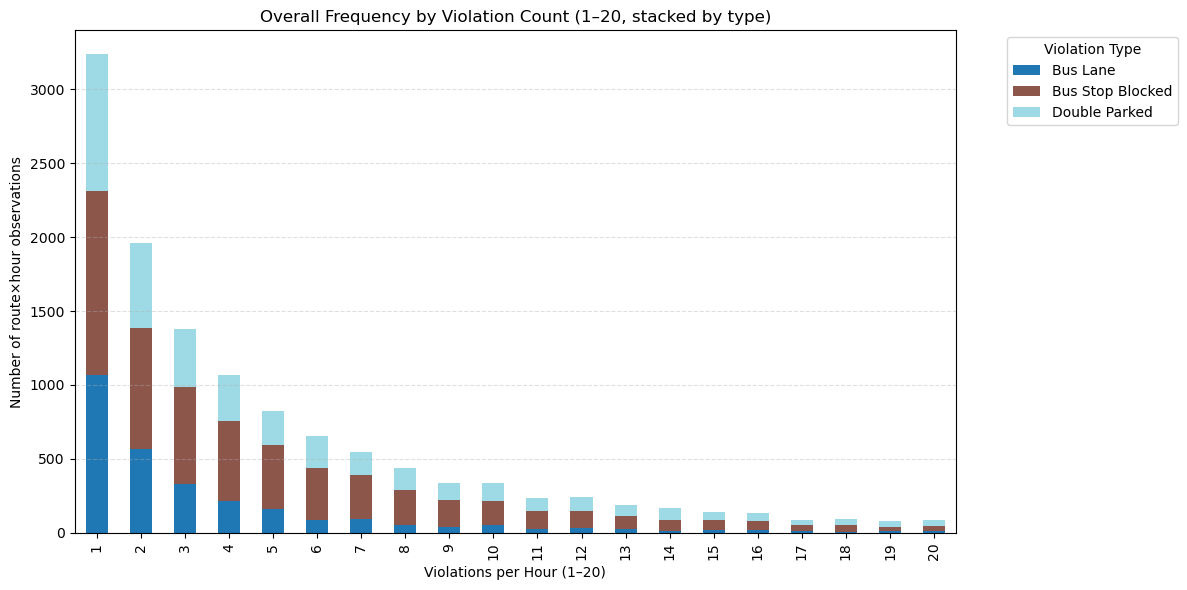

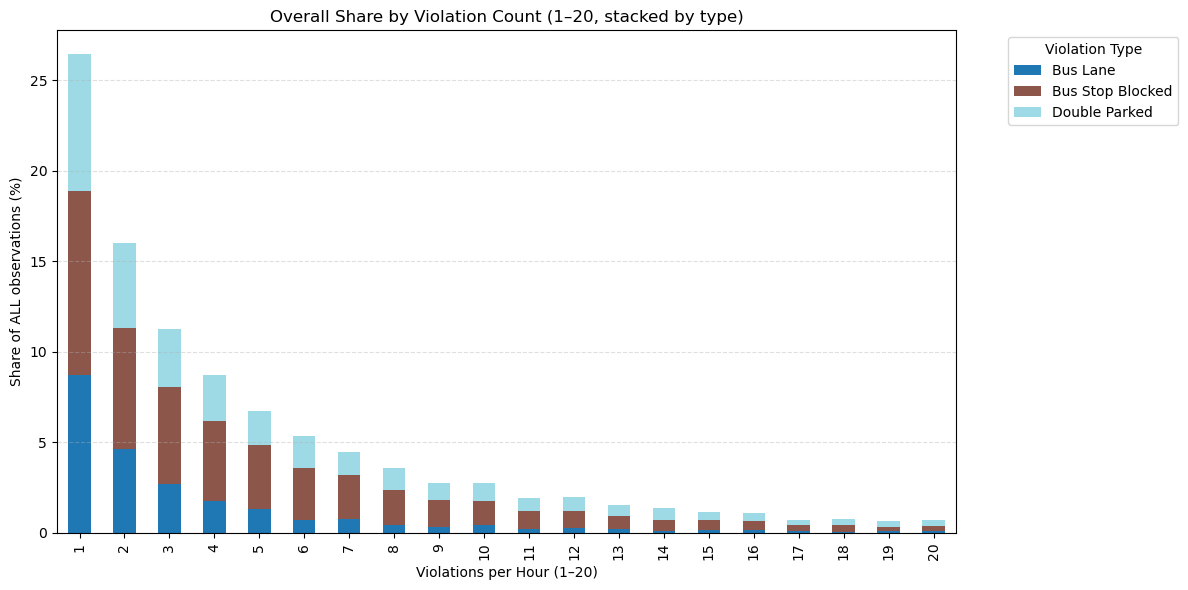

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CLIP_AT = 20                 # now 1..20
COUNTS = list(range(1, CLIP_AT+1))

def clip_and_sum(df, count_col, label):
    df = df.copy()
    # keep only 1..20 exactly (exclude 0 and >20)
    df = df[(df[count_col] >= 1) & (df[count_col] <= CLIP_AT)]
    agg = df.groupby(count_col, as_index=False)["OCCURRENCES"].sum()
    agg["VIOLATION_TYPE"] = label
    return agg.rename(columns={count_col: "COUNT"})

# Build frequency tables per type
dp_freq = clip_and_sum(dp_summary, VIOL_DP, "Double Parked")
bs_freq = clip_and_sum(bs_summary, VIOL_BS, "Bus Stop Blocked")
bl_freq = clip_and_sum(bl_summary, VIOL_BL, "Bus Lane")

# Combine and pivot: rows = COUNT (1..20), cols = types, values = occurrences
freq_all = pd.concat([dp_freq, bs_freq, bl_freq], ignore_index=True)
wide = (freq_all
        .pivot_table(index="COUNT", columns="VIOLATION_TYPE", values="OCCURRENCES", aggfunc="sum")
        .reindex(COUNTS)
        .fillna(0))

# -----------------------------
# A) Stacked bars with ABSOLUTE counts
# -----------------------------
ax = wide.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")

ax.set_xlabel("Violations per Hour (1–20)")
ax.set_ylabel("Number of route×hour observations")
ax.set_title("Overall Frequency by Violation Count (1–20, stacked by type)")
ax.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# -----------------------------
# B) (Optional) Stacked bars as PERCENT of ALL observations
# -----------------------------
total_all = wide.values.sum()
if total_all > 0:
    wide_pct_overall = wide / total_all * 100.0
    ax = wide_pct_overall.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")

    ax.set_xlabel("Violations per Hour (1–20)")
    ax.set_ylabel("Share of ALL observations (%)")
    ax.set_title("Overall Share by Violation Count (1–20, stacked by type)")
    ax.legend(title="Violation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
